# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Martin Cao

Datum: 22.11.23

Gruppe: -

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie nutzt man Sensoren mit einem Raspberry Pi, um Temperaturmessungen durchzuführen? Wie errechnet man daraus die Wärmekapazität von Wasser?

Disclaimer: Bei mir hat der Code für die Auswertung nicht funktioniert und hat folgende Fehler wiedergegeben, welche ich leider nicht mehr beheben konnte. Daher werte ich Messdaten, welche ich von einem Freund erhalten habe, aus; der Code dafür ist von mir selbst geschrieben, lediglich die Daten habe ich von anderen erhalten.

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/picture_231010_Beispielbild_Tasse_Auswertung.jpg" width="800">

## Versuchsauswertung

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [6]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

filename = "heat_capacity.h5"

# DONE #

In [7]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
with h5.File("data/heat_capacity/" + filename, "r") as f:
    data_time1 = f["RawData"]["1ee8727d-d019-6a50-b11c-30078fcfbec4"]["timestamp"][:27]
    data_t1    = f["RawData"]["1ee8727d-d019-6a50-b11c-30078fcfbec4"]["temperature"][:27]
    data_t2    = f["RawData"]["1ee8727f-3d11-6bff-a315-13c2f8e433db"]["temperature"][:27]
    
# DONE #

#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


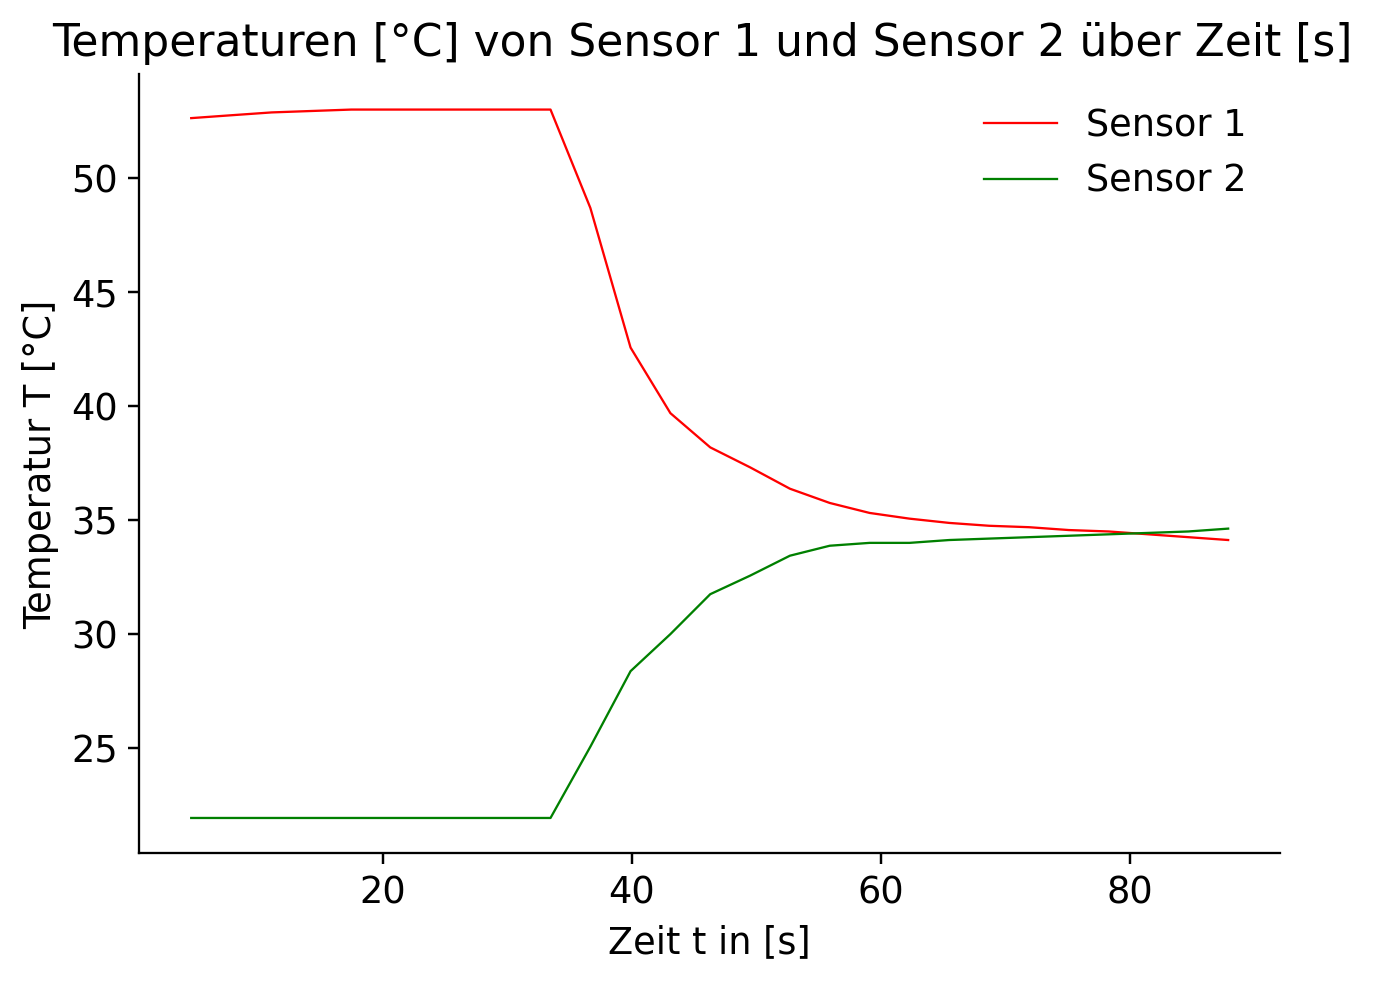

In [8]:
# TODO: Use the temperature and time data for plotting

plt.plot(data_time1, data_t1, color ="r", label = "Sensor 1")
plt.plot(data_time1, data_t2, color ="g", label = "Sensor 2")
    
plt.xlabel("Zeit t in [s]")
plt.ylabel("Temperatur T [°C]")
plt.title("Temperaturen [°C] von Sensor 1 und Sensor 2 über Zeit [s] ")
plt.legend();
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [17]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.

import json

with open("datasheets/probe_heat_capacity.json") as f:
    metadata = json.load(f)
    
#Auslesen des Gewichts als integer
mass_data =metadata["probe"]["metadata"]
mass_s = [int(s) for s in mass_data.split() if s.isdigit()] 
s = [str(i) for i in mass_s] #Auslesen des Gewichts als integer
mass = int('s')
# DONE #

ValueError: invalid literal for int() with base 10: 's'

#### (iV) Anfangs- und Endwert der Temperatur

In [18]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity

start_temp_1 = data_t1[0]
start_temp_2 = data_t2[0]
m_temp = (data_t1[26]+data_t2[26])/2

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [19]:
# TODO: Calculate heat capacity of the calorimeter

mass_r = mass/1000
heat_capacity = (mass_r*water_heat_capa*(start_temp_1-m_temp))/(m_temp-start_temp_2)-(mass_r*water_heat_capa)

# DONE #

NameError: name 'mass' is not defined

#### (Vi) Ergebnis

In [ ]:
# TODO: Print result

print(heat_capacity, "kJ/K")

# DONE #

## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Der Wert ist in der richtigen Größenordnung, allerdings liegt er unter dem Tabellenwert. Das liegt wahrscheinlich daran, dass Hitze über die Öffnung der Tassen, als auch über das Material der Tasse entweichen kann.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [3]:
Der Code für den Versuch hat bei mir leider nicht ganz funktioniert, die Auswertung war allerdings dann machbarer.

Exception: File `'s_uuid6.py'` not found.